In [2]:
import pandas as pd
import numpy as np
import scipy
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
m = [(30,7,3),(31,6,52),(32,6,40),(33,6,30),(34,6,20),(35,6,10),
     (36,6,1),(37,5,53),(38,5,45),(39,5,37),(40,5,29),(41,5,22),
     (42,5,16),(43,5,9),(44,5,3),(45,4,57),(46,4,51),(47,4,46),
     (48,4,41),(49,4,36),(50,4,31),(51,4,27),(52,4,22),(53,4,18),
     (54,4,14),(55,4,10),(56,4,6),(57,4,3),(58,3,59),(59,3,56),
     (60,3,52),(61,3,49),(62,3,46),(63,3,43),(64,3,40),(65,3,37),
     (66,3,34),(67,3,31),(68,3,29),(69,3,26),(70,3,24),(71,3,21),
     (72,3,19),(73,3,16),(74,3,14),(75,3,12),(76,3,10),(77,3,8),
     (78,3,6),(79,3,3),(80,3,1),(81,3,0),(82,2,58),(83,2,56),
     (84,2,54),(85,2,52)]
m_pace = [[vdot, datetime.timedelta(minutes=minutes, seconds=seconds)] for vdot, minutes, seconds in m]

t = [(30,6,24),(35,5,40),(40,5,6),(45,4,38),(50,4,15),(55,3,56),
     (60,3,40),(65,3,26),(70,3,14),(75,3,4),(80,2,54),(85,2,46)]
t_pace = [[vdot, datetime.timedelta(minutes=minutes, seconds=seconds)] for vdot, minutes, seconds in t]

i = [(30,5,55),(31,5,45),(32,5,35),(33,5,27),(34,5,20),
     (35,5,12),(40,4,42),(45,4,16),(50,3,55),(55,3,37),
     (60,3,23),(65,3,10),(70,2,59),(75,2,49),(80,2,41),(85,2,33)]
i_pace = [[vdot, datetime.timedelta(minutes=minutes, seconds=seconds)] for vdot, minutes, seconds in i]

In [44]:
df = pd.DataFrame(data=i_pace, columns=['vdot', 'mins_per_km'])

df['sec_per_km'] = df['mins_per_km'].apply(lambda x: int(x.total_seconds()))
df['vdot_log'] = np.log(df['vdot'])
df.head()

,vdot,mins_per_km,sec_per_km,vdot_log
0,30,0 days 00:05:55,355,3.401197
1,31,0 days 00:05:45,345,3.433987
2,32,0 days 00:05:35,335,3.465736
3,33,0 days 00:05:27,327,3.496508
4,34,0 days 00:05:20,320,3.526361


<AxesSubplot:xlabel='vdot', ylabel='sec_per_km'>

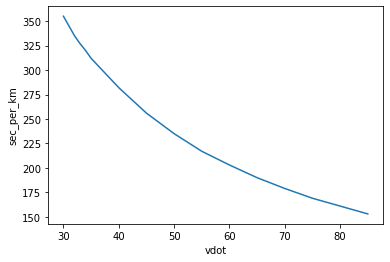

In [45]:
sns.lineplot(x=df.vdot, y=df.sec_per_km)

In [59]:
from sklearn.linear_model import LinearRegression

X = df[['vdot', 'vdot_log']]
y = 1 / df.sec_per_km

clf = LinearRegression()
clf.fit(X, y)

print(clf.score(X, y))
print(f'{clf.coef_}, {clf.intercept_}')
print(np.round((1 / clf.predict(X)), 0) - df.sec_per_km.values)
print(f"'coef': np.array({clf.coef_}), 'intercept': {clf.intercept_}")

0.9999587644214298
[5.54231655e-05 6.40550449e-04], -0.0010179014592616746
[-1.  0.  1.  1.  0.  1. -1. -1.  0.  1.  0.  0.  0.  0.  0.  0.]
'coef': np.array([5.54231655e-05 6.40550449e-04]), 'intercept': -0.0010179014592616746


In [58]:
clf.coef_

array([5.54231655e-05, 6.40550449e-04])

### M (marathon pace)

In [547]:
linear_regression_stats = {
    'm': {'coef': [5.20176045e-05, 5.60078308e-04], 'intercept': -0.0011082739994069607},
    't': {'coef': [5.15585827e-05, 5.76422687e-04], 'intercept': -0.0009109768232632535},
}

In [ ]:
def get_marathon_pace_km_raw(vdot: int):
    coef = np.array([5.20176045e-05, 5.60078308e-04])
    intercept = -0.0011082739994069607
    X = np.array([vdot, np.log(vdot)])
    return 1 / (intercept + (X.dot(coef)))

def get_marathon_pace_km(vdot: int):
    seconds = np.round(get_marathon_pace_km_raw(vdot), 0)
    return str(datetime.timedelta(seconds=seconds))

def get_marathon_pace_mi(vdot: int):
    seconds = np.round(get_marathon_pace_km_raw(vdot) / 0.621371, 0)
    return str(datetime.timedelta(seconds=seconds))

vdot = 50
print(get_marathon_pace_km(vdot))
print(get_marathon_pace_mi(vdot))

# @ VDOT 50
# 4:31 mins per km
# 7:17 mins per mile

0:04:31
0:07:17


### T (threshold pace)

In [545]:
def get_threshold_pace_km_raw(vdot: int):
    coef = np.array([5.15585827e-05, 5.76422687e-04])
    intercept = -0.0009109768232632535
    X = np.array([vdot, np.log(vdot)])
    return 1 / (intercept + (X.dot(coef)))

def get_threshold_pace_km(vdot: int):
    seconds = np.round(get_threshold_pace_km_raw(vdot), 0)
    return str(datetime.timedelta(seconds=seconds))

def get_threshold_pace_mi(vdot: int):
    seconds = np.round(get_threshold_pace_km_raw(vdot) / 0.621371, 0)
    return str(datetime.timedelta(seconds=seconds))

vdot = 50
print(get_threshold_pace_km(vdot))
print(get_threshold_pace_mi(vdot))

# @ VDOT 50
# 4:15 mins per km
# 6:50 mins per mile

0:04:15
0:06:50
